In this notebook we try to count only CP violating KL and using as normalization the given luminosity.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import params as my
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [83]:
data = pd.read_csv('data.csv')

In [3]:
vtx = data['# vtx with two tracks of opposite curvature'].to_numpy()
x = data['XV (cm)'].to_numpy()
y = data['YV(cm)'].to_numpy()
z = data['ZV(cm)'].to_numpy()
px1 = data['Track1 PX(MeV) '].to_numpy()
py1 = data['Track1 PY(MeV) '].to_numpy()
pz1 = data['Track1 PZ(MeV) '].to_numpy()
px2 = data['Track2 PX(MeV) '].to_numpy()
py2 = data['Track2 PY(MeV) '].to_numpy()
pz2 = data['Track2 PZ(MeV) '].to_numpy()

In [42]:
N_phi = my.luminosity * my.sigma_ee_phi
N_KLKS = N_phi * my.BR_phi_KK
print(f"Number of produced KL/KS pairs = {int(N_KLKS)}")

N_KL_CP = N_KLKS * my.BR_KL_2pi
print(f"Expected CP violating KL = {int(N_KL_CP)}")

print(f"BR = {N_KL_CP/N_KLKS}")

N_KL_CP_measured = N_KL_CP * my.acceptance * my.epsL
print(f"\nDetected CP violating KL = {int(N_KL_CP_measured)}")

N_KL_measured = N_KLKS * my.acceptance 
print(f"Expected KL = {int(N_KL_measured)}")

N_KS_measured = N_KLKS * my.BR_KS_2pi * my.epsS
print(f"Expected KS = {int(N_KS_measured)}")

print(f"\nNumber of events in data : {len(np.where(vtx == 1)[0])}")

Number of produced KL/KS pairs = 204000
Expected CP violating KL = 408
BR = 0.002

Detected CP violating KL = 51
Expected KL = 51000
Expected KS = 98532

Number of events in data : 200743


In [5]:
# Define some useful quantities
radius = np.sqrt(x*x + y*y + z*z)

mass_array = np.repeat(my.m_pi, len(data))
E1 = my.getE(mass_array, px1, py1, pz1)
E2 = my.getE(mass_array, px2, py2, pz2)
inv_mass = my.invmass(E1+E2, px1+px2, py1+py2, pz1+pz2)

p_array = np.repeat(my.p_K0, len(data))
p_tot = my.norm(px1+px2, py1+py2, pz1+pz2)

mass_K_array = np.repeat(my.m_K0, len(data))
pKx, pKy, pKz = my.getComponents(p_array, x, y, z)
E_K = my.getE(mass_K_array, pKx, pKy, pKz)

delta_px = pKx - px1 - px2
delta_py = pKy - py1 - py2
delta_pz = pKz - pz1 - pz2

missing_p = my.norm(pKx-px1-px2, pKy-py1-py2, pKz-pz1-pz2)
M2 = (E_K - E1 -E2)**2 - missing_p**2

angle_K_pi = my.angle_of_vectors(pKx, pKy, pKz, px1+px2, py1+py2, pz1+pz2)

In [65]:
# Define cuts

cut_r = radius >= 10
cut_r_inv = np.invert(cut_r)
cut_FV = (z > -my.zlim) & (z < my.zlim) & (np.sqrt(x*x+y*y) > my.xmin) & (np.sqrt(x*x+y*y) < my.xmax)
cut_m = (inv_mass > my.m_K0 - 7) & (inv_mass < my.m_K0 + 7)
cut_p = (p_tot > my.p_K0 - 20) & (p_tot < my.p_K0 + 20)
cut_M2 = (M2 > -100) & (M2 < 100)

cut_pxpypz = (delta_px > -15) & (delta_px < 15) & (delta_py > -15) & (delta_py < 15) & (delta_pz > -15) & (delta_pz < 15)

cut_angle = (0.998 < np.cos(np.radians(angle_K_pi))) & (np.cos(np.radians(angle_K_pi)) <= 1)

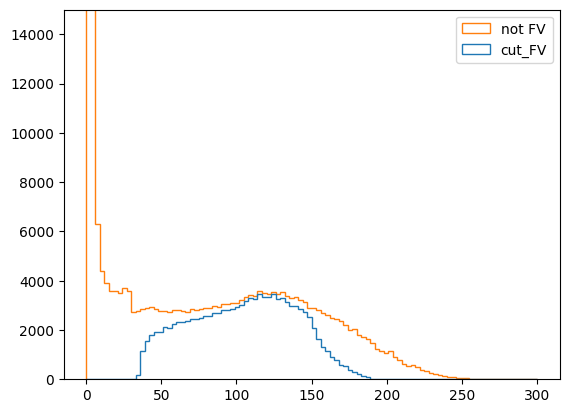

In [66]:
nbins = 100
lims = (0, 300)

#plt.hist(radius, histtype = 'step', bins = nbins, range = lims, label = 'data')
# plt.hist(radius[cut_FV], histtype = 'step', bins = nbins, range = lims, label = 'cut_FV')

plt.hist([radius[cut_FV], radius[cut_FV == False]], 
         bins = nbins, range = lims, histtype = 'step',
         label = ['cut_FV','not FV'], stacked = True)

plt.ylim(0, 15000)
plt.legend();

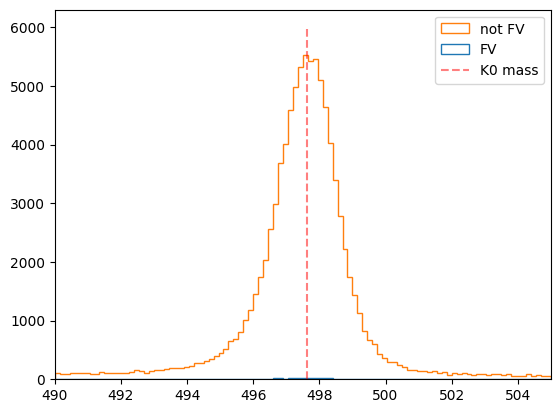

In [8]:
lims = (490, 505)

nbins = 100

plt.hist([inv_mass[cut_angle], inv_mass[(cut_angle) == False]], 
         histtype = 'step', bins = nbins, range = lims, 
         label = ['FV', 'not FV'], stacked = True)

# plt.hist([inv_mass[cut_r], inv_mass[(cut_r) == False]], 
#          histtype = 'step', bins = nbins, range = lims, 
#          label = ['KL', 'KS'], stacked = True)

plt.vlines(my.m_K0, 0, 6000, 'r', linestyle = 'dashed', label = 'K0 mass', alpha = 0.5)
plt.xlim(lims)
# plt.ylim(0,100)
plt.legend();

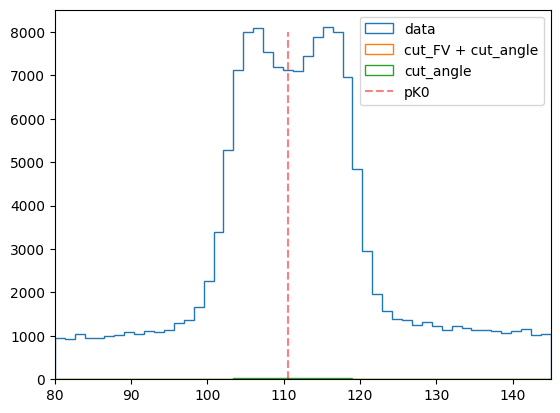

In [9]:
bins = 50
lims = (80,145)

plt.hist(p_tot, histtype = 'step', bins = bins, range = lims, label = 'data')
plt.hist(p_tot[cut_FV & cut_angle], histtype = 'step', bins = bins, range = lims, label = 'cut_FV + cut_angle')
plt.hist(p_tot[cut_angle], histtype = 'step', bins = bins, range = lims, label = 'cut_angle')
plt.vlines(my.p_K0, 0, 8000, 'r', linestyle = 'dashed', label = 'pK0', alpha = 0.5)
plt.xlim(lims)
plt.legend();

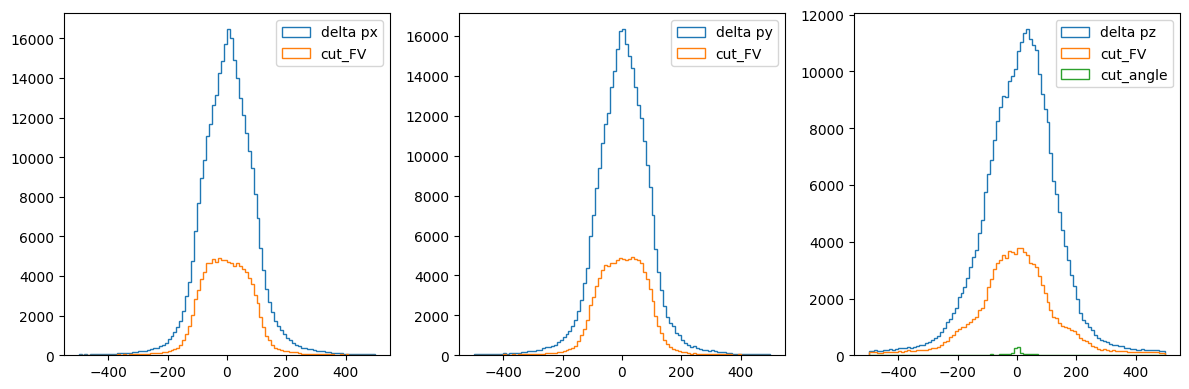

In [10]:
plt.figure(figsize = (12,4))

bins = 100
lims = (-500,500)

plt.subplot(131)


plt.hist(delta_px, histtype = 'step', bins = bins, range = lims,label = 'delta px')
plt.hist(delta_px[cut_FV], histtype = 'step', bins = bins, range = lims,label = 'cut_FV')
plt.legend()

plt.subplot(132)


plt.hist(delta_py, histtype = 'step', bins = bins, range = lims,label = 'delta py')
plt.hist(delta_py[cut_FV], histtype = 'step', bins = bins, range = lims,label = 'cut_FV')
plt.legend()

plt.subplot(133)

plt.hist(delta_pz, histtype = 'step', bins = bins, range = lims, label = 'delta pz')
plt.hist(delta_pz[cut_FV], histtype = 'step', bins = bins, range = lims, label = 'cut_FV')
plt.hist(delta_pz[cut_angle], histtype = 'step', bins = bins, range = lims, label = 'cut_angle')

plt.legend()

plt.tight_layout();

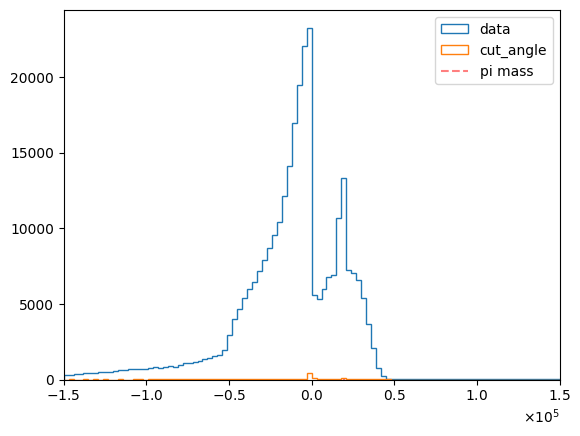

In [14]:
lims = (-150000,150000)
bins = 100
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,3), useMathText = True)

plt.hist(M2, histtype = 'step', bins = bins, range = lims, label = 'data');
# plt.hist(M2[cut_FV], histtype = 'step', bins = bins, range = lims, label = 'cut_FV')
# plt.hist(M2[cut_angle], histtype = 'step', bins = bins, range = lims, label = 'cut_angle')
plt.hist(M2[cut_angle], histtype = 'step', bins = bins, range = lims, label = 'cut_angle')

plt.vlines(my.m_pi**2, 0, 50, 'r', linestyle = 'dashed', label = 'pi mass', alpha = 0.5)
plt.legend()
plt.xlim(lims);

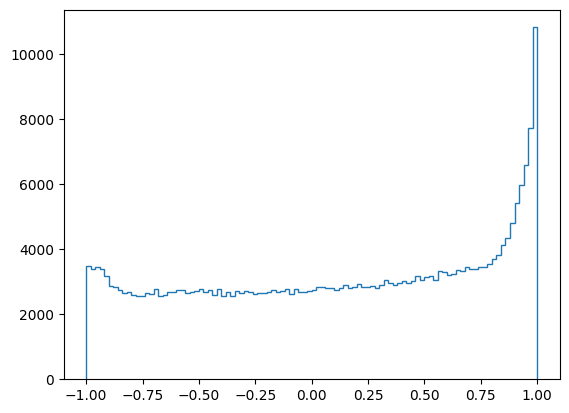

In [15]:
theta = my.getTheta(x,y,z)

bins = 100

n, bins, _ = plt.hist(np.cos(theta), histtype = 'step', bins = bins);
# plt.hist(np.cos(theta[cut_FV]), histtype = 'step', bins = bins);
# plt.hist(np.cos(theta[cut_r_inv]), histtype = 'step', bins = bins);
# plt.hist(np.cos(theta[cut_m]), histtype = 'step', bins = bins);

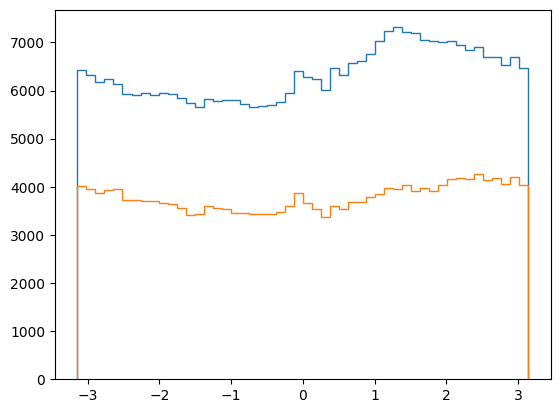

In [16]:
phi = my.getPhi(x,y,z)

bins = 50

plt.hist(phi, histtype = 'step', bins = bins);
plt.hist(phi[cut_r], histtype = 'step', bins = bins);

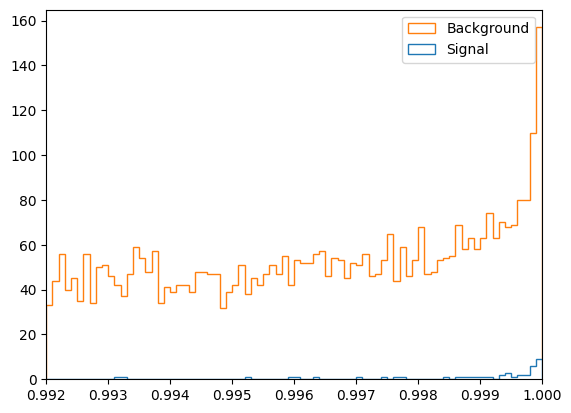

In [17]:
bins = 80
lims = (0.992,1)

# plt.hist(np.cos(np.radians(angle_K_pi)), histtype = 'step', bins = bins, range = lims);
plt.hist([np.cos(np.radians(angle_K_pi[cut_FV & cut_M2])), np.cos(np.radians(angle_K_pi[(cut_FV & cut_M2) == False]))], 
         histtype = 'step', bins = bins, range = lims,
         label = ['Signal', 'Background'], stacked = True);

plt.xlim(0.992, 1)
plt.legend();

# Event Display

In [80]:
sliced = data.iloc[0:1]
sliced

#  # vtx with two tracks of opposite curvature   XV (cm)    YV(cm)   
0  0                                            1  0.216207  0.246072  \

     ZV(cm)  Track1 PX(MeV)   Track1 PY(MeV)   Track1 PZ(MeV)    
0  1.364715       151.192932       -61.700985        54.802067  \

   Track2 PX(MeV)   Track2 PY(MeV)   Track2 PZ(MeV)   
0      -209.739105       142.082977         5.926435

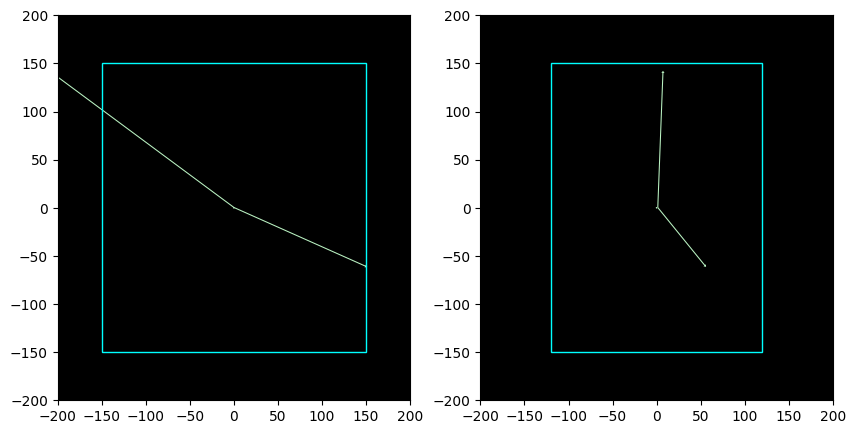

In [81]:
N = sliced['#'].values

from matplotlib.patches import Rectangle

event = N
fig, ax = plt.subplots(1, 2,figsize=(10, 5))


for i in event:

    col = (np.random.random(), np.random.random(), np.random.random())
    
    V = [x[i],y[i]]
    origin = [0,0] # origin point

    ax[0].quiver(*origin, V[0], V[1], color = col , angles='xy', scale_units='xy',
               scale=1, headlength = 2, headaxislength = 2, width = 0.005, ls = '--')
    
    track1 = [px1[i],py1[i]]
    ax[0].quiver(*V, track1[0], track1[1], color=col, angles='xy', scale_units='xy', 
               scale=1, headlength = 2, headaxislength = 2, width = 0.003)
    
    track2 = [px2[i],py2[i]]
    ax[0].quiver(*V, track2[0], track2[1], color=col, angles='xy', scale_units='xy', 
               scale=1, headlength = 2, headaxislength = 2, width = 0.003)

    ax[0].add_patch(Rectangle((-150, -150), 300, 300,
             edgecolor = 'cyan',
             facecolor = 'blue',
             fill=False,
             lw=1))
    
    V = [z[i],y[i]]
    origin = [0,0] # origin point

    ax[1].quiver(*origin, V[0], V[1], color = col , angles='xy', scale_units='xy',
               scale=1, headlength = 2, headaxislength = 2, width = 0.005, ls = '--')
    
    track1 = [pz1[i],py1[i]]
    ax[1].quiver(*V, track1[0], track1[1], color=col, angles='xy', scale_units='xy', 
               scale=1, headlength = 2, headaxislength = 2, width = 0.003)
    track2 = [pz2[i],py2[i]]
    ax[1].quiver(*V, track2[0], track2[1], color=col, angles='xy', scale_units='xy', 
               scale=1, headlength = 2, headaxislength = 2, width = 0.003)
    
    ax[1].add_patch(Rectangle((-120, -150), 240, 300,
         edgecolor = 'cyan',
         facecolor = 'blue',
         fill=False,
         lw=1))
    

ax[0].set_xlim([-200, 200])
ax[0].set_ylim([-200, 200])
ax[1].set_xlim([-200, 200])
ax[1].set_ylim([-200, 200])
ax[0].set_facecolor('black')
ax[1].set_facecolor('black')

# Data Processing

In [71]:
vtx1 = vtx                                                                         # Auxiliary variable to eventually slice data

events = np.where(vtx1 == 1)[0]
ext_events = np.append(events,len(vtx1))                                           # extend array to avoid problems in for loop


tol = np.pi/10


cuts_CP_KL = cut_m & cut_angle                                                     # Define cuts to discriminate CP violating K-Long
cuts_KS = cut_m & cut_p


KL = 0
KL_CP = 0




for i, eve in enumerate(events):                                                   # Loop through events
    
    event_length = ext_events[i+1]-ext_events[i]
    print(f'-> Event {i} Index {eve} Length {event_length}')
    
    if event_length == 1:
        if cut_FV[eve] == True:                                                    #  a KL has been detected
            KL += 1
            print('\tFound KL')
            if cuts_CP_KL[eve]:                                                    # a CP violating KL has been detected
                KL_CP += 1
                print('\tFound CP violating KL')
        else :                                                                     # KS found so a KL must be somewhere
            print('\tNo KL found!')
    
    
    elif event_length > 1:                                                         # Case with more than 1 vertex
        
        BTB = 0
        
        for j in range(0, event_length):
            for k in range(j+1, event_length):
                
                if (-tol + np.pi < (theta[j+eve] + theta[k+eve]) < tol + np.pi):
                    if (np.pi-tol < abs(phi[k+eve] - phi[j+eve]) < np.pi+tol):
                        if (radius[k+eve] <= radius[j+eve]):
                            if cut_FV[j+eve]:
                                # KL was found and tagged
                                KL += 1
                                BTB += 1
                                print(f'\t{k+eve} is a KS, {j+eve} is a KL')
                                if cuts_CP_KL[j+eve]:
                                    # CP violating KL
                                    KL_CP += 1
                                    print(f'\t{j+eve} is a CP violating KL')
                        elif (radius[k+eve] > radius[j+eve]):
                            if cut_FV[k+eve]:
                                KL += 1
                                BTB += 1
                                print(f'\t{j+eve} is a KS, {k+eve} is a KL')
                                if cuts_CP_KL[k+eve]:
                                    # CP violating KL
                                    KL_CP += 1
                                    print(f'\t{k+eve} is a CP violating KL')
                else:
                    print(f'\tNo Kaon to Tag {j+eve}, {k+eve}')
        
        
        if BTB == 0:
            for j in range(0, event_length):                                         # detected KL 
                    if cut_FV[j+eve]:
                        KL += 1
                        print(f'\tFound isolated KL {j+eve}')
                        if cuts_CP_KL[j+eve]:                                       # a CP violating KL has been detected
                            KL_CP += 1
                            print(f'\tFound isolated CP violating KL {j+eve}')
                        break

-> Event 0 Index 0 Length 1
	No KL found!
-> Event 1 Index 1 Length 1
	No KL found!
-> Event 2 Index 2 Length 1
	No KL found!
-> Event 3 Index 3 Length 1
	No KL found!
-> Event 4 Index 4 Length 1
	No KL found!
-> Event 5 Index 5 Length 1
	No KL found!
-> Event 6 Index 6 Length 4
	No Kaon to Tag 6, 8
	6 is a KS, 9 is a KL
	No Kaon to Tag 7, 9
	No Kaon to Tag 8, 9
-> Event 7 Index 10 Length 1
	No KL found!
-> Event 8 Index 11 Length 1
	No KL found!
-> Event 9 Index 12 Length 2
	12 is a KS, 13 is a KL
-> Event 10 Index 14 Length 1
	No KL found!
-> Event 11 Index 15 Length 3
	No Kaon to Tag 15, 16
	No Kaon to Tag 15, 17
	No Kaon to Tag 16, 17
	Found isolated KL 16
-> Event 12 Index 18 Length 1
	Found KL
-> Event 13 Index 19 Length 2
	No Kaon to Tag 19, 20
-> Event 14 Index 21 Length 1
	No KL found!
-> Event 15 Index 22 Length 2
	No Kaon to Tag 22, 23
	Found isolated KL 22
-> Event 16 Index 24 Length 1
	No KL found!
-> Event 17 Index 25 Length 1
	No KL found!
-> Event 18 Index 26 Length 1
	

	No KL found!
-> Event 7264 Index 11292 Length 1
	No KL found!
-> Event 7265 Index 11293 Length 1
	No KL found!
-> Event 7266 Index 11294 Length 1
	No KL found!
-> Event 7267 Index 11295 Length 1
	No KL found!
-> Event 7268 Index 11296 Length 1
	No KL found!
-> Event 7269 Index 11297 Length 1
	No KL found!
-> Event 7270 Index 11298 Length 1
	No KL found!
-> Event 7271 Index 11299 Length 1
	No KL found!
-> Event 7272 Index 11300 Length 2
	No Kaon to Tag 11300, 11301
-> Event 7273 Index 11302 Length 2
	No Kaon to Tag 11302, 11303
-> Event 7274 Index 11304 Length 1
	No KL found!
-> Event 7275 Index 11305 Length 2
	No Kaon to Tag 11305, 11306
	Found isolated KL 11306
-> Event 7276 Index 11307 Length 2
	No Kaon to Tag 11307, 11308
	Found isolated KL 11307
-> Event 7277 Index 11309 Length 1
	No KL found!
-> Event 7278 Index 11310 Length 1
	No KL found!
-> Event 7279 Index 11311 Length 1
	No KL found!
-> Event 7280 Index 11312 Length 3
	No Kaon to Tag 11313, 11314
	Found isolated KL 11313
-> 

-> Event 15680 Index 24534 Length 3
	No Kaon to Tag 24534, 24536
	Found isolated KL 24534
-> Event 15681 Index 24537 Length 4
	No Kaon to Tag 24537, 24538
	No Kaon to Tag 24537, 24539
	No Kaon to Tag 24537, 24540
	No Kaon to Tag 24538, 24539
	No Kaon to Tag 24539, 24540
	Found isolated KL 24538
-> Event 15682 Index 24541 Length 3
	No Kaon to Tag 24541, 24542
	No Kaon to Tag 24541, 24543
	No Kaon to Tag 24542, 24543
	Found isolated KL 24541
-> Event 15683 Index 24544 Length 1
	No KL found!
-> Event 15684 Index 24545 Length 2
	No Kaon to Tag 24545, 24546
	Found isolated KL 24546
-> Event 15685 Index 24547 Length 1
	Found KL
-> Event 15686 Index 24548 Length 3
	No Kaon to Tag 24548, 24549
	No Kaon to Tag 24548, 24550
	Found isolated KL 24548
-> Event 15687 Index 24551 Length 1
	No KL found!
-> Event 15688 Index 24552 Length 1
	No KL found!
-> Event 15689 Index 24553 Length 4
	No Kaon to Tag 24553, 24556
	No Kaon to Tag 24554, 24555
	Found isolated KL 24553
-> Event 15690 Index 24557 Lengt

	No KL found!
-> Event 24107 Index 37822 Length 1
	No KL found!
-> Event 24108 Index 37823 Length 1
	No KL found!
-> Event 24109 Index 37824 Length 1
	No KL found!
-> Event 24110 Index 37825 Length 1
	No KL found!
-> Event 24111 Index 37826 Length 1
	No KL found!
-> Event 24112 Index 37827 Length 2
	No Kaon to Tag 37827, 37828
	Found isolated KL 37828
-> Event 24113 Index 37829 Length 2
	No Kaon to Tag 37829, 37830
-> Event 24114 Index 37831 Length 2
	No Kaon to Tag 37831, 37832
-> Event 24115 Index 37833 Length 2
	No Kaon to Tag 37833, 37834
	Found isolated KL 37834
-> Event 24116 Index 37835 Length 3
	No Kaon to Tag 37835, 37836
	No Kaon to Tag 37835, 37837
	No Kaon to Tag 37836, 37837
	Found isolated KL 37836
-> Event 24117 Index 37838 Length 1
	No KL found!
-> Event 24118 Index 37839 Length 1
	No KL found!
-> Event 24119 Index 37840 Length 1
	No KL found!
-> Event 24120 Index 37841 Length 1
	No KL found!
-> Event 24121 Index 37842 Length 1
	No KL found!
-> Event 24122 Index 37843 L

-> Event 31318 Index 49277 Length 1
	No KL found!
-> Event 31319 Index 49278 Length 1
	No KL found!
-> Event 31320 Index 49279 Length 1
	No KL found!
-> Event 31321 Index 49280 Length 1
	Found KL
-> Event 31322 Index 49281 Length 1
	No KL found!
-> Event 31323 Index 49282 Length 1
	No KL found!
-> Event 31324 Index 49283 Length 2
	No Kaon to Tag 49283, 49284
-> Event 31325 Index 49285 Length 2
	No Kaon to Tag 49285, 49286
	Found isolated KL 49286
-> Event 31326 Index 49287 Length 2
	No Kaon to Tag 49287, 49288
	Found isolated KL 49287
-> Event 31327 Index 49289 Length 2
	No Kaon to Tag 49289, 49290
-> Event 31328 Index 49291 Length 2
	No Kaon to Tag 49291, 49292
	Found isolated KL 49291
-> Event 31329 Index 49293 Length 1
	Found KL
-> Event 31330 Index 49294 Length 1
	No KL found!
-> Event 31331 Index 49295 Length 1
	No KL found!
-> Event 31332 Index 49296 Length 2
	No Kaon to Tag 49296, 49297
	Found isolated KL 49296
-> Event 31333 Index 49298 Length 1
	No KL found!
-> Event 31334 Ind

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




	No Kaon to Tag 190599, 190600
	No Kaon to Tag 190599, 190601
	No Kaon to Tag 190600, 190601
	Found isolated KL 190599
-> Event 121070 Index 190602 Length 3
	No Kaon to Tag 190602, 190603
	No Kaon to Tag 190602, 190604
	Found isolated KL 190602
-> Event 121071 Index 190605 Length 1
	No KL found!
-> Event 121072 Index 190606 Length 1
	Found KL
-> Event 121073 Index 190607 Length 1
	No KL found!
-> Event 121074 Index 190608 Length 1
	No KL found!
-> Event 121075 Index 190609 Length 1
	Found KL
-> Event 121076 Index 190610 Length 1
	No KL found!
-> Event 121077 Index 190611 Length 1
	No KL found!
-> Event 121078 Index 190612 Length 3
	No Kaon to Tag 190612, 190613
	No Kaon to Tag 190612, 190614
	No Kaon to Tag 190613, 190614
	Found isolated KL 190614
-> Event 121079 Index 190615 Length 1
	No KL found!
-> Event 121080 Index 190616 Length 1
	Found KL
-> Event 121081 Index 190617 Length 1
	No KL found!
-> Event 121082 Index 190618 Length 1
	No KL found!
-> Event 121083 Index 190619 Length 1

-> Event 129236 Index 203961 Length 1
	No KL found!
-> Event 129237 Index 203962 Length 1
	No KL found!
-> Event 129238 Index 203963 Length 2
	No Kaon to Tag 203963, 203964
	Found isolated KL 203964
-> Event 129239 Index 203965 Length 2
	No Kaon to Tag 203965, 203966
	Found isolated KL 203966
-> Event 129240 Index 203967 Length 1
	No KL found!
-> Event 129241 Index 203968 Length 1
	No KL found!
-> Event 129242 Index 203969 Length 3
	No Kaon to Tag 203969, 203970
	No Kaon to Tag 203969, 203971
	No Kaon to Tag 203970, 203971
	Found isolated KL 203970
-> Event 129243 Index 203972 Length 1
	No KL found!
-> Event 129244 Index 203973 Length 1
	No KL found!
-> Event 129245 Index 203974 Length 2
	No Kaon to Tag 203974, 203975
	Found isolated KL 203975
-> Event 129246 Index 203976 Length 1
	No KL found!
-> Event 129247 Index 203977 Length 2
	Found isolated KL 203977
-> Event 129248 Index 203979 Length 1
	No KL found!
-> Event 129249 Index 203980 Length 1
	No KL found!
-> Event 129250 Index 2039

	Found isolated KL 216628
-> Event 137173 Index 216630 Length 2
	No Kaon to Tag 216630, 216631
-> Event 137174 Index 216632 Length 3
	No Kaon to Tag 216632, 216633
	No Kaon to Tag 216632, 216634
	No Kaon to Tag 216633, 216634
	Found isolated KL 216633
-> Event 137175 Index 216635 Length 1
	No KL found!
-> Event 137176 Index 216636 Length 2
	No Kaon to Tag 216636, 216637
	Found isolated KL 216636
-> Event 137177 Index 216638 Length 1
	No KL found!
-> Event 137178 Index 216639 Length 1
	No KL found!
-> Event 137179 Index 216640 Length 1
	No KL found!
-> Event 137180 Index 216641 Length 3
	No Kaon to Tag 216641, 216642
	No Kaon to Tag 216641, 216643
	No Kaon to Tag 216642, 216643
	Found isolated KL 216642
-> Event 137181 Index 216644 Length 1
	No KL found!
-> Event 137182 Index 216645 Length 1
	No KL found!
-> Event 137183 Index 216646 Length 1
	No KL found!
-> Event 137184 Index 216647 Length 1
	Found KL
-> Event 137185 Index 216648 Length 1
	No KL found!
-> Event 137186 Index 216649 Len

	Found isolated KL 228589
-> Event 144851 Index 228591 Length 2
	No Kaon to Tag 228591, 228592
	Found isolated KL 228592
-> Event 144852 Index 228593 Length 2
	No Kaon to Tag 228593, 228594
	Found isolated KL 228593
-> Event 144853 Index 228595 Length 2
	Found isolated KL 228595
-> Event 144854 Index 228597 Length 1
	No KL found!
-> Event 144855 Index 228598 Length 1
	No KL found!
-> Event 144856 Index 228599 Length 2
	No Kaon to Tag 228599, 228600
-> Event 144857 Index 228601 Length 1
	No KL found!
-> Event 144858 Index 228602 Length 1
	No KL found!
-> Event 144859 Index 228603 Length 1
	No KL found!
-> Event 144860 Index 228604 Length 1
	No KL found!
-> Event 144861 Index 228605 Length 2
	No Kaon to Tag 228605, 228606
	Found isolated KL 228606
-> Event 144862 Index 228607 Length 2
	Found isolated KL 228608
-> Event 144863 Index 228609 Length 1
	No KL found!
-> Event 144864 Index 228610 Length 1
	No KL found!
-> Event 144865 Index 228611 Length 2
	No Kaon to Tag 228611, 228612
-> Even

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [68]:
KL

72185

In [69]:
KL_CP

41

In [85]:
print(f'measured BR = {(KL_CP/(my.acceptance*my.epsL))/N_KLKS:.2}')

measured BR = 0.0016
